In [1]:
import json
from pprint import pprint
import matplotlib.pyplot as plt
import csv
%matplotlib inline  
import numpy as np
  
#loading json file and assign it to a variable.
data = json.load(open('TDS_sound_analysis.json', 'rb'))
 
#pprint(data) #printing just for checking for purposes. better uncommented as might slow down computer due to its size

In [50]:
#importing CSV files 


with open('csv_files/bright.csv', 'rb') as f:
    reader = csv.reader(f)
    bright_list_csv = list(reader)
    #removing brackets from list. same for the rest of the csv files
    bright_list = [l[0] for l in bright_list_csv]
    
with open('csv_files/warm.csv', 'rb') as f:
    reader = csv.reader(f)
    warm_list_csv = list(reader)
    warm_list = [l[0] for l in warm_list_csv]
    
with open('csv_files/rough.csv', 'rb') as f:
    reader = csv.reader(f)
    rough_list_csv = map(tuple, reader)
    rough_list = [l[0] for l in rough_list_csv]
    
with open('csv_files/reverb.csv', 'rb') as f:
    reader = csv.reader(f)
    reverb_list_csv = map(tuple, reader)
    reverb_list = [l[0] for l in reverb_list_csv]
    
with open('csv_files/clear.csv', 'rb') as f:
    reader = csv.reader(f)
    clear_list_csv = list(reader)
    clear_list = [l[0] for l in clear_list_csv]
    
with open('csv_files/hollow.csv', 'rb') as f:
    reader = csv.reader(f)
    hollow_list_csv = list(reader)
    hollow_list = [l[0] for l in hollow_list_csv]
    
with open('csv_files/deep.csv', 'rb') as f:
    reader = csv.reader(f)
    deep_list_csv = list(reader)
    deep_list = [l[0] for l in deep_list_csv]
    
with open('csv_files/punchy.csv', 'rb') as f:
    reader = csv.reader(f)
    punchy_list_csv = list(reader)
    punchy_list = [l[0] for l in punchy_list_csv]
    
with open('csv_files/metallic.csv', 'rb') as f:
    reader = csv.reader(f)
    metallic_list_csv = list(reader)
    metallic_list = [l[0] for l in metallic_list_csv]
    
with open('sharp.csv', 'rb') as f:
    reader = csv.reader(f)
    sharp_list_csv = list(reader)
    sharp_list = [l[0] for l in sharp_list_csv]
    
with open('csv_files/hard.csv', 'rb') as f:
    reader = csv.reader(f)
    hard_list_csv = list(reader) 
    hard_list = [l[0] for l in hard_list_csv]


IOError: [Errno 2] No such file or directory: 'csv_files/bright.csv'

In [10]:
#El número de sonidos en tu dataset:
nb_sounds = len(set(bright_list + hard_list +warm_list + rough_list + reverb_list + clear_list + hollow_list + deep_list + punchy_list + metallic_list + sharp_list))


In [11]:
nb_sounds

4298

In [12]:
sounds_list = (set(bright_list + hard_list +warm_list + rough_list + reverb_list + clear_list + hollow_list + deep_list + punchy_list + metallic_list + sharp_list))

In [13]:
#sounds_list  #checking list content

In [14]:
#data[sounds_list]["analysis_stats"]["sfx"]["tristimulus"]

In [20]:
#to see all content when printing
#np.set_printoptions(threshold=np.nan)

#creating matrix X
#X = []  #all features_not used yet

#creating matrix to compute mean of the descriptors
sc_mean = []
sflux_mean = []
mfcc_mean = []
zcr_mean = []
trist_mean = []
oteher_mean = []

for fs_id in data:
    #vector with all the features...not used now
    #feature_vector = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_centroid"],data[fs_id]["analysis_stats"]["lowlevel"]["spectral_flux"],data[fs_id]["analysis_stats"]["lowlevel"]["mfcc"],data[fs_id]["analysis_stats"]["sfx"]["tristimulus"],data[fs_id]["analysis_stats"]["sfx"]["oddtoevenharmonicenergyratio"],data[fs_id]["analysis_stats"]["lowlevel"]["zerocrossingrate"],

    #example for the of the mean of different descriptores
    feature_vector_sc_mean = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_centroid"]["mean"]
    feature_vector_sflux_mean = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_flux"]["mean"]
    feature_vector_mfcc_mean = data[fs_id]["analysis_stats"]["lowlevel"]["mfcc"]["mean"]
    feature_vector_zcr_mean = data[fs_id]["analysis_stats"]["lowlevel"]["zerocrossingrate"]["mean"]
    feature_vector_trist_mean = data[fs_id]["analysis_stats"]["sfx"]["tristimulus"]["mean"]
    feature_vector_oteher_mean = data[fs_id]["analysis_stats"]["sfx"]["oddtoevenharmonicenergyratio"]["mean"]
    
    #Appending values...
    #X.append(feature_vector)  #not used now
    sc_mean.append(feature_vector_sc_mean)
    sflux_mean.append(feature_vector_sflux_mean)
    mfcc_mean.append(feature_vector_mfcc_mean)
    zcr_mean.append(feature_vector_zcr_mean)
    trist_mean.append(feature_vector_trist_mean)
    oteher_mean.append(feature_vector_oteher_mean)
    
    
#all features, not used at the moment   
#X = np.array(X)

sc_mean = np.array(sc_mean)
sflux_mean = np.array(sflux_mean)
mfcc_mean = np.array(mfcc_mean)
zcr_mean = np.array(zcr_mean)
trist_mean = np.array(trist_mean)
oteher_mean = np.array(oteher_mean)

#Not used at the moment as aformentioned
#len(feature_vector) 
#len(X)
#X  #printing out matrix 
#Y

In [49]:
#Just checking out values inside arrays
#("Spetral Centroid Mean"),sc_mean, ("Spetral Flux Mean"),sflux_mean,("MFCC Mean"), mfcc_mean, ("ZCR Mean"),zcr_mean,("Tristimulus Mean"), trist_mean,("OddtoEvenharmonicRatio Mean"), oteher_mean

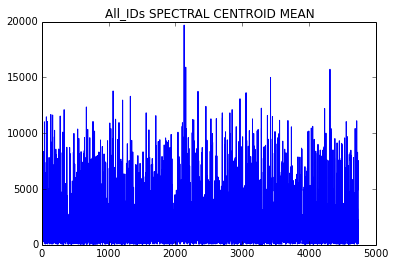

In [31]:
plt.title ('All_IDs SPECTRAL CENTROID MEAN')
plt.plot(sc_mean)

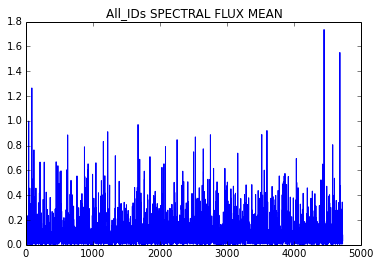

In [32]:
plt.title ('All_IDs SPECTRAL FLUX MEAN')
plt.plot(sflux_mean)


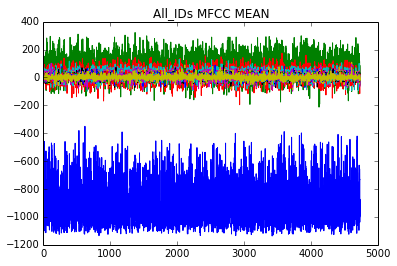

In [33]:
plt.title ('All_IDs MFCC MEAN')

plt.plot(mfcc_mean)


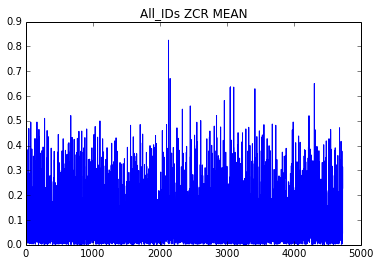

In [34]:
plt.title ('All_IDs ZCR MEAN')

plt.plot(zcr_mean)


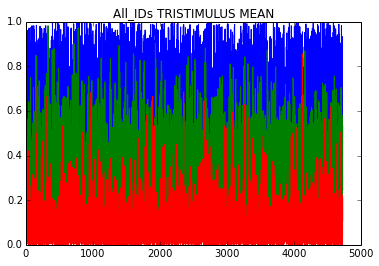

In [35]:
plt.title ('All_IDs TRISTIMULUS MEAN')
plt.plot(trist_mean)


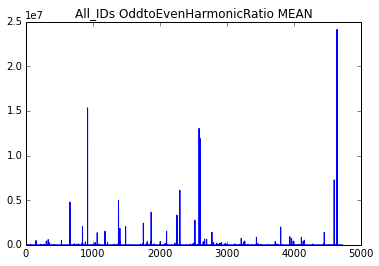

In [36]:
plt.title ('All_IDs OddtoEvenHarmonicRatio MEAN')
plt.plot(oteher_mean)